# Vorlesungswiederholung

### Lasso

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

Die Schwierigkeit besteht darin Alpha so zu optimieren, dass das Modell die zugrunde liegenden Daten mit optimalem "Grad der Generalisierung" und Varianz wiedergibt.
Als Kriterium kommen der resultierende MSE-Wert (mean squared error) oder sogenannte Informationskriterien wie das Akaike information criterion (AIC) oder das Bayes information criterion (BIC) in Frage. 

Im Folgenden Beispiel wird Alpha anhand des MSE-Werts optimiert. Mit definierten Werten von Alpha werden Modelle bestimmt. Das beste Modell wird mit k-facher Cross-Validierung ausgewählt.

### K-fache Cross-Validierung

Um Overfitting zu erkennen gibt es die Strategie der Cross-Validierung. Damit soll eine möglichst hohe Generalisierung sichergestellt werden. Jede Art von Wissen über die Daten kann schon bei der Selektion von sogenannten "Hyperparametern" (externe Konfigurationsvariablen) die Modellierung beeinflussen. Um diesen Effekt zu minimieren wird das Trainings-Set unterteilt und ein Validierungs-Set erzeugt. Mit dem Validierungs-Set erfolgt eine Vorbewertung des Modells und somit der Hyperparameter. Nach der Modellierung wird das Modell wie gehabt mit den Test-Daten überprüft. 

Durch die weitere Unterteilung senkt sich aber wiederum die Anzahl der verfügbaren Stichproben und das Modell könnte an Aussagekraft verlieren. Die Auswahl der Daten hätte einen zufälligen Einfluss auf das Modell. 

Bei der k-fachen Cross-Validierung wird dieses Problem umgangen, indem die Trainingsdaten in k kleinere Datensätze unterteilt werden. Anschließend werden k Schritte durchlaufen, welche immer den gleichen Ablauf haben: Ein Modell wird anhand von k-1 Trainingdatensätzen erstellt und mit dem übrigen Datensatz validiert (seine Performance bestimmt). Der Durchschnitt aller k Validierungen ergibt die Gesamtperformance. 

<img src="k-fache_Cross_Validierung.png">

# Interaktiver Teil
**Ziel**: Erstellung eines Modells zur Vorhersage der Zugfestigkeit

<img src="TrainingValidationPlan.png" width="600"> 

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"Luo_Q_2023.1_Vereinfacht.csv", sep=';', decimal='.')
data

,Power,Speed,Avizo_Porosity_Mean,Avizo_Porosity_Std,Archimedes_porosity_Mean,Archimedes_porosity_Std,Pore_quantity_Sum,Diameter_Avizo_Mean,Diameter_Avizo_Std,Projected_Pore_area_Avg,...,Strength_Mean,Strength_Std,Yield_mean,Yield_Std,Uniform_Mean,Uniform_Std,Ductility_Mean,Ductility_Std,Youngs_Modulus_Mean,Youngs_Modulus_Std
0,275,800,0.8774,0.0452,1.3189,0.8816,44006.0,50.0,15.0,3798.0,...,1021,6,942,10,6.15,0.08,10.70,0.76,112,5.35
1,275,760,1.9382,0.1495,1.8791,0.8775,57383.0,52.0,16.0,3885.0,...,1008,7,931,12,5.81,0.21,9.19,1.06,108,4.31
2,275,720,2.3027,0.5489,2.1131,0.8748,57874.0,52.0,17.0,4046.0,...,992,16,904,35,6.13,0.64,8.98,0.69,109,11.88
3,275,680,1.6876,0.1638,2.3318,0.8728,67526.0,52.0,18.0,4413.0,...,1009,20,929,21,5.52,0.17,8.50,1.33,108,4.15
4,275,640,2.0607,0.0928,2.5762,0.8700,93003.0,50.0,17.0,4040.0,...,995,27,914,35,5.37,0.38,7.23,1.22,113,11.39
5,275,600,1.7519,0.1885,2.7962,0.8677,62355.0,53.0,19.0,4468.0,...,982,14,892,44,5.27,0.32,6.95,0.54,128,42.53
6,275,840,1.2318,0.0008,1.2031,0.8836,56069.0,50.0,15.0,3448.0,...,1038,8,960,13,6.06,0.25,10.76,0.78,113,6.59
7,275,880,1.1349,0.0489,1.0150,0.8853,50236.0,49.0,14.0,3237.0,...,1053,9,974,19,6.13,0.16,11.87,1.03,117,10.02
8,275,920,0.5741,0.0222,0.8406,0.8877,35273.0,47.0,13.0,3240.0,...,1058,7,984,13,5.92,0.26,12.35,0.91,113,3.20
9,275,960,0.5011,0.0508,0.7168,0.8880,22806.0,47.0,12.0,2975.0,...,1070,10,994,14,6.37,0.47,14.03,0.62,119,6.20


Wir sehen uns die Spalten der Daten einmal vollständig an und fassen sie in die Unterschiedlichen Kategorien zusammen. 

In [5]:
data.keys()

Index(['Power', 'Speed', 'Avizo_Porosity_Mean', 'Avizo_Porosity_Std',
       'Archimedes_porosity_Mean', 'Archimedes_porosity_Std',
       'Pore_quantity_Sum', 'Diameter_Avizo_Mean', 'Diameter_Avizo_Std',
       'Projected_Pore_area_Avg', 'Projected_Pore_area_Max',
       'Projected_Pore_area_Sum', 'Sphericity_Avizo_Mean',
       'Sphericity_Avizo_Std', 'Roughness_Avg_Mean', 'Roughness_Avg_Std',
       'Roughness_RMS_Mean', 'Roughness_RMS_Std', 'Grain_diameter_Mean',
       'Grain_diameter_Std', 'Grain_aspect_Mean', 'Grain_aspect_Std',
       'Vicker_Mean', 'Vicker_Std', 'Strength_Mean', 'Strength_Std',
       'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
       'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean',
       'Youngs_Modulus_Std'],
      dtype='object')

In [6]:
manufacturing_parameter = ['Power', 'Speed']

mechanical_parameter = ['Strength_Mean', 'Strength_Std', 'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
                        'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean', 'Youngs_Modulus_Std']

std_parameter = ['Avizo_Porosity_Std', 'Archimedes_porosity_Std','Diameter_Avizo_Std', 'Sphericity_Avizo_Std', 
                 'Roughness_Avg_Std', 'Roughness_RMS_Std', 'Grain_diameter_Std', 'Grain_aspect_Std', 'Vicker_Std',
                'Strength_Std', 'Yield_Std', 'Uniform_Std', 'Ductility_Std', 'Youngs_Modulus_Std']

pore_parameter = ['Avizo_Porosity_Mean', 'Archimedes_porosity_Mean', 'Archimedes_porosity_Std',
                  'Pore_quantity_Sum', 'Diameter_Avizo_Mean', 'Diameter_Avizo_Std', 'Projected_Pore_area_Avg', 
                  'Projected_Pore_area_Max', 'Projected_Pore_area_Sum', 'Sphericity_Avizo_Mean', 'Sphericity_Avizo_Std', 
                  'Roughness_Avg_Mean', 'Roughness_Avg_Std', 'Roughness_RMS_Mean', 'Roughness_RMS_Std']

#Separate train and test sets
x = data.drop(labels=(manufacturing_parameter+mechanical_parameter+std_parameter), axis=1)
y = data['Strength_Mean']

x[:5]

,Avizo_Porosity_Mean,Archimedes_porosity_Mean,Pore_quantity_Sum,Diameter_Avizo_Mean,Projected_Pore_area_Avg,Projected_Pore_area_Max,Projected_Pore_area_Sum,Sphericity_Avizo_Mean,Roughness_Avg_Mean,Roughness_RMS_Mean,Grain_diameter_Mean,Grain_aspect_Mean,Vicker_Mean
0,0.8774,1.3189,44006.0,50.0,3798.0,758200.0,280158800.0,0.98,12.69,15.70,204,1.92,358
1,1.9382,1.8791,57383.0,52.0,3885.0,602800.0,287163500.0,0.97,11.99,14.36,205,1.98,375
2,2.3027,2.1131,57874.0,52.0,4046.0,1547400.0,339011800.0,0.97,15.26,19.20,188,1.88,354
3,1.6876,2.3318,67526.0,52.0,4413.0,1141000.0,415251300.0,0.97,14.38,18.71,167,1.89,378
4,2.0607,2.5762,93003.0,50.0,4040.0,1715500.0,533824800.0,0.96,15.84,19.99,168,1.89,371


Hier werden unterschiedliche Zusammenhänge geplottet. Bei einigen Parameter sind klare lineare Zusammenhänge zu erkennen.

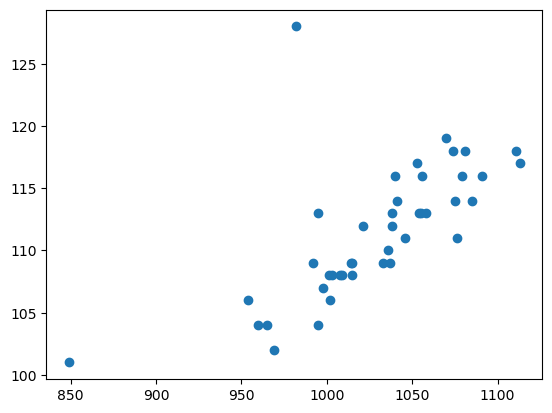

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x = data['Strength_Mean'], y = data['Youngs_Modulus_Mean'])

Nicht alle Werte wurden ermittelt. Um diese dennoch zu verwenden, werden diese auf den Mittelwert gesetzt. Bei der Verwendung einer Regularisierung wie Lasso ($L_1$), Ridge ($L_2$) oder beide gleichzeitig ElasticNet müssen die Daten normalisiert werden. Die hier durchgeführte Datenoperation skaliert die Daten so, dass sie einen Mittelwert von 0 und Standardabweichung von 1 erreichen.

In [9]:
from sklearn.preprocessing import StandardScaler

x_without_NaN = x.fillna(x.mean())

scaler = StandardScaler()
scaler.fit(x_without_NaN)
x_norm = scaler.transform(x_without_NaN)

print(x_norm.mean(axis=0))
print(x_norm.std(axis=0))

[-1.05735526e-17 -1.21595855e-16  1.37456184e-16  1.26221784e-16
  4.22942105e-17  3.70074342e-17 -7.40148683e-17  2.95200372e-15
 -1.40099572e-16 -1.14458707e-15  4.91670197e-16 -2.66057018e-15
 -1.75520973e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
y_np = y.to_numpy() #Convert to numpy
print(y_np.shape)
y_np = y_np[:,np.newaxis]
print(y_np.shape)

(42,)
(42, 1)


Parameter für Lasso, alpha ist die $L_1$-Regularisierung
```
sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```
Parameter für Ridge, alpha ist die $L_2$-Regularisierung
```
sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
```
Parameter für Elastic Net, alpha ist die Gesamtregulierung aus $l1_{ratio} * L_1 + L_2$
```
sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```

Scores of each fold [458.60613403699995, 1120.2251924256793, 772.5771799824366, 248.47877838945556, 3725.4849157762246]


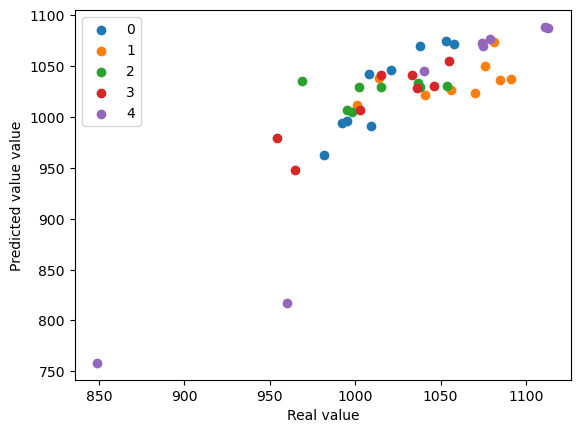

In [11]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE

kf = KFold(n_splits=5)

scores = []
models = []

plt.figure()
for fold, (idx_train, idx_test) in enumerate(kf.split(x_norm)):
    x_train = x_norm[idx_train]
    y_train = y_np[idx_train]
    x_test = x_norm[idx_test]
    y_test = y_np[idx_test]
    
    model = LinearRegression() #Model parameter
    model.fit(x_train,y_train)
    
    y_predict = model.predict(x_test)
    score = MSE(y_test, y_predict)
    plt.scatter(x = y_test, y = y_predict, label = str(fold))
    
    scores.append(score)
    models.append(model)

plt.legend()
plt.xlabel("Real value")
plt.ylabel("Predicted value value")

print(f'Scores of each fold {scores}')

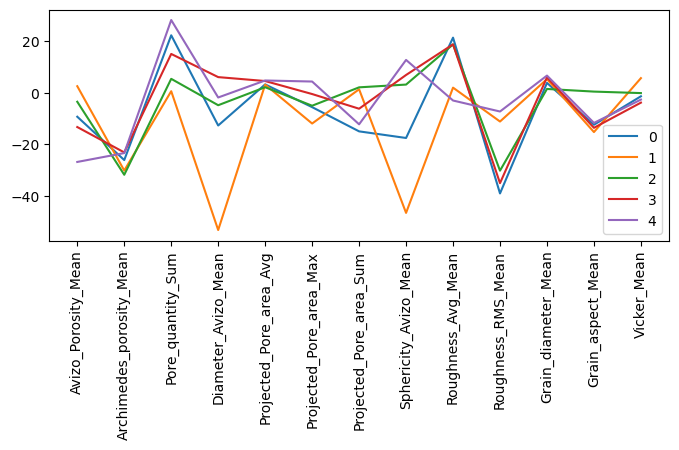

In [12]:

keys = x_without_NaN.keys()

plt.figure(figsize=(8,3))
for fold, model in enumerate(models):
    plt.plot(np.squeeze(model.coef_), label = str(fold))
plt.xticks(range(len(keys)), keys, rotation='vertical')
plt.legend()
plt.show()